In [1]:
import pickle
import pandas as pd

% matplotlib inline

# Load scores

In [2]:
scores = pickle.load(open('../data/holdout_movie_scores.p', 'rb'))
scores.head()

,class_ratio,cosine_sim,female_prop,final_score,movie_id,nt_betweenness,nt_degree
49,-0.259059,0,0.178273,0.583749,m49,1.79325,1.20628
496,-0.56077,0,0,0.56476,m497,2.09213,1.29244
211,0.319085,0,0.289823,0.063796,m212,-0.170258,-0.11967
249,-0.190499,0,0.619765,0.386291,m250,0.544825,0.957364
142,0.528942,0,0.0769231,0.79965,m143,1.59733,1.79506


# Merge with movie metadata

In [3]:
headers = ['movie_id', 'movie_title', 'movie_year', 'imdb_rating', 'imdb_vote', 'genre']

filepath = '../cornell_movie_dialogs_corpus/movie_titles_metadata.txt'

lines = []

with open(filepath, 'r', encoding = 'iso-8859-1') as f:
    for line in f:
        cols = line.split(' +++$+++ ')
        lines.append(cols)
            
movies = pd.DataFrame(lines, columns = headers)
    
movies = movies[['movie_id', 'movie_title', 'imdb_rating', 'movie_year']]

scores = scores.merge(movies, on = 'movie_id')

genres = pickle.load(open('../data/genres.p', 'rb'))

scores = scores.merge(genres, on = 'movie_id')

order = ['movie_id', 'movie_title', 'genre', 'movie_year', 'imdb_rating', 'female_prop', 'class_ratio', 'cosine_sim',
         'nt_betweenness', 'nt_degree', 'final_score']

scores = scores[order]

scores.head()

,movie_id,movie_title,movie_year,imdb_rating,female_prop,class_ratio,cosine_sim,nt_betweenness,nt_degree,final_score
0,m49,detroit rock city,1999,6.50,0.178273,-0.259059,0,1.79325,1.20628,0.583749
1,m497,rush hour,1998,6.80,0,-0.56077,0,2.09213,1.29244,0.56476
2,m212,the lost boys,1987,7.00,0.289823,0.319085,0,-0.170258,-0.11967,0.063796
3,m250,assassins,1995,6.00,0.619765,-0.190499,0,0.544825,0.957364,0.386291
4,m143,mystery men,1999,5.90,0.0769231,0.528942,0,1.59733,1.79506,0.79965


In [4]:
nums = ['female_prop', 'class_ratio', 'cosine_sim', 'nt_betweenness', 'nt_degree', 'final_score', 'imdb_rating']

scores[nums] = scores[nums].apply(pd.to_numeric)

# Sort by proportion female

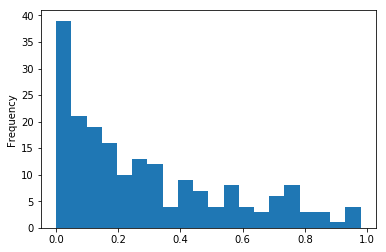

In [5]:
scores['female_prop'].plot.hist(bins = 20)

In [6]:
bottom_3 = scores.sort_values('female_prop').head(3)
bottom_3

,movie_id,movie_title,movie_year,imdb_rating,female_prop,class_ratio,cosine_sim,nt_betweenness,nt_degree,final_score
46,m214,the time machine,2002,5.7,0.0,0.149573,0.0,1.404162,1.238589,0.558465
96,m31,birthday girl,2001,6.0,0.0,0.409270,0.0,1.225856,0.861627,0.499351
50,m145,next friday,2000,5.4,0.0,-0.272382,0.0,1.141797,1.120116,0.397906


In [7]:
top_3 = scores.sort_values('female_prop', ascending = False).head(3)
top_3

,movie_id,movie_title,movie_year,imdb_rating,female_prop,class_ratio,cosine_sim,nt_betweenness,nt_degree,final_score
90,m279,the bridges of madison county,1995,7.2,0.979478,0.473121,0.0,-0.018574,-0.314135,0.223978
64,m8,a nightmare on elm street: the dream child,1989,4.7,0.941748,0.278135,0.0,-2.101468,-1.846344,-0.545586
71,m234,agnes of god,1985,6.5,0.932084,0.814635,0.0,-1.787707,-1.795057,-0.367209


In [8]:
no_female_lines = scores[scores['female_prop'] == 0]
no_female_lines.shape

(25, 10)

**There are 25 movies with no female lines (and 0 movies with no male lines)**

# Sort by cosine simularity

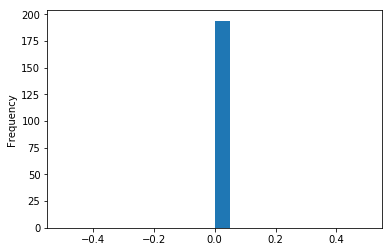

In [9]:
scores['cosine_sim'].plot.hist(bins = 20)

In [10]:
bottom_3 = scores.sort_values('cosine_sim').head(3)
bottom_3

,movie_id,movie_title,movie_year,imdb_rating,female_prop,class_ratio,cosine_sim,nt_betweenness,nt_degree,final_score
0,m49,detroit rock city,1999,6.5,0.178273,-0.259059,0.0,1.793252,1.206278,0.583749
131,m119,life as a house,2001,7.5,0.293827,0.269876,0.0,0.498986,-0.579941,0.096549
132,m316,dave,1993,6.8,0.000000,-0.348166,0.0,1.400978,1.211663,0.452895


In [11]:
top_3 = scores.sort_values('cosine_sim', ascending = False).head(3)
top_3

,movie_id,movie_title,movie_year,imdb_rating,female_prop,class_ratio,cosine_sim,nt_betweenness,nt_degree,final_score
0,m49,detroit rock city,1999,6.5,0.178273,-0.259059,0.0,1.793252,1.206278,0.583749
153,m89,highlander,1986,7.2,0.442219,0.061259,0.0,-0.304843,-0.230793,-0.006432
131,m119,life as a house,2001,7.5,0.293827,0.269876,0.0,0.498986,-0.579941,0.096549


# Sort by final score

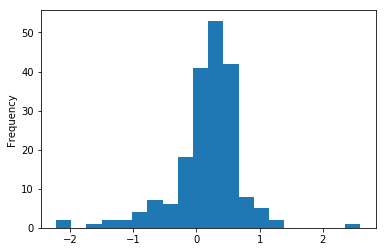

In [12]:
scores['final_score'].plot.hist(bins = 20)

In [13]:
bottom_3 = scores.sort_values('final_score').head(3)
bottom_3

,movie_id,movie_title,movie_year,imdb_rating,female_prop,class_ratio,cosine_sim,nt_betweenness,nt_degree,final_score
198,m304,contact,1997,7.4,0.754613,0.227936,0.0,-6.795130,-5.275269,-2.217570
148,m447,arcade,1993,4.6,0.783394,-0.249994,0.0,-6.402909,-4.846654,-2.143233
106,m440,mimic,1997,5.7,0.000000,0.046200,0.0,-5.107734,-3.538826,-1.720072


In [14]:
top_3 = scores.sort_values('final_score', ascending = False).head(3)
top_3

,movie_id,movie_title,movie_year,imdb_rating,female_prop,class_ratio,cosine_sim,nt_betweenness,nt_degree,final_score
172,m594,vertigo,1958,8.6,0.908284,0.465937,0.0,6.742208,4.846654,2.592617
14,m307,crash,2004/I,8.0,0.715278,0.120806,0.0,3.677568,2.423327,1.387396
192,m187,solaris,2002,6.2,0.000000,0.393010,0.0,3.064640,3.231102,1.337750


# Final score over time

In [15]:
def clean_year(x):
    if len(x) > 4:
        x = x[:4]
    return x

scores['year'] = scores['movie_year'].apply(clean_year)
scores['year'] = scores['year'].astype('datetime64[ns]')

def get_decade(x):
    return str(x.year)[2]

scores['decade'] = scores['year'].apply(get_decade)
scores.drop('year', inplace = True, axis = 1)

In [16]:
by_decade = pd.DataFrame(scores.groupby('decade')['final_score'].mean()).reset_index()
by_decade = by_decade.fillna(0)

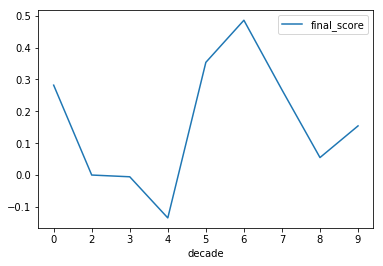

In [17]:
by_decade.plot.line(x = 'decade', y = 'final_score')

# Final score and IMDB rating

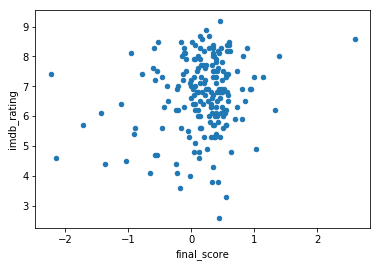

In [18]:
scores.plot.scatter(x = 'final_score', y = 'imdb_rating')

# Final score by genre

In [19]:
by_genre = pd.DataFrame(scores.groupby('genre')['final_score'].mean()).reset_index()

top_10 = ['drama',
 'action',
 'comedy',
 'crime',
 'horror',
 'adventure',
 'thriller',
 'biography',
 'fantasy',
 'sci-fi']

by_genre = by_genre[by_genre['genre'].isin(top_10)]

KeyError: 'genre'

In [ ]:
by_genre = by_genre.sort_values('final_score')

In [ ]:
by_genre.plot.bar(x = 'genre', y = 'final_score', legend = False)